# U2: Ejemplo de speech recognition

In [1]:
# system libraries
import os
import sys

# data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# audio
import IPython.display as ipd
from IPython.display import Audio
import librosa
import librosa.display

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### RAVDESS dataset

One of the more common dataset used because of its quality of speakers, recording and it has 24 actors of different genders. Filename identifiers:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [29]:
# link full dataset https://zenodo.org/records/1188976 or
# https://zenodo.org/records/1188976/files/Audio_Speech_Actors_01-24.zip?download=1

# path to the directory
RAVD = "/Users/husseinlopez/Documents/CICESE/Cursos/2024-I/CDSI/data/kaggle/Audio_Speech_Actors_01-24/"

In [34]:
dirl_list = os.listdir(RAVD)
dirl_list.sort()

emotion = []
gender = []
path = []
for i in dirl_list:
    if not i.startswith('.'):
        fname = os.listdir(RAVD + i)
        for f in fname:
            part = f.split('.')[0].split('-')
            emotion.append(int(part[2]))
            temp = int(part[6])
            if temp%2 == 0:
                temp = "female"
            else:
                temp = "male"
            gender.append(temp)
            path.append(RAVD + i + '/' + f)

        
RAVD_df = pd.DataFrame(emotion)
RAVD_df = RAVD_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAVD_df = pd.concat([pd.DataFrame(gender),RAVD_df],axis=1)
RAVD_df.columns = ['gender','emotion']
RAVD_df['labels'] =RAVD_df.gender + '_' + RAVD_df.emotion
RAVD_df['source'] = 'RAVDESS'  
RAVD_df = pd.concat([RAVD_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAVD_df = RAVD_df.drop(['gender', 'emotion'], axis=1)
RAVD_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_disgust        96
male_fear           96
male_sad            96
female_fear         96
male_angry          96
female_angry        96
female_surprise     96
male_surprise       96
female_disgust      96
female_sad          96
female_happy        96
male_happy          96
Name: labels, dtype: int64

## Exploratory analysis 

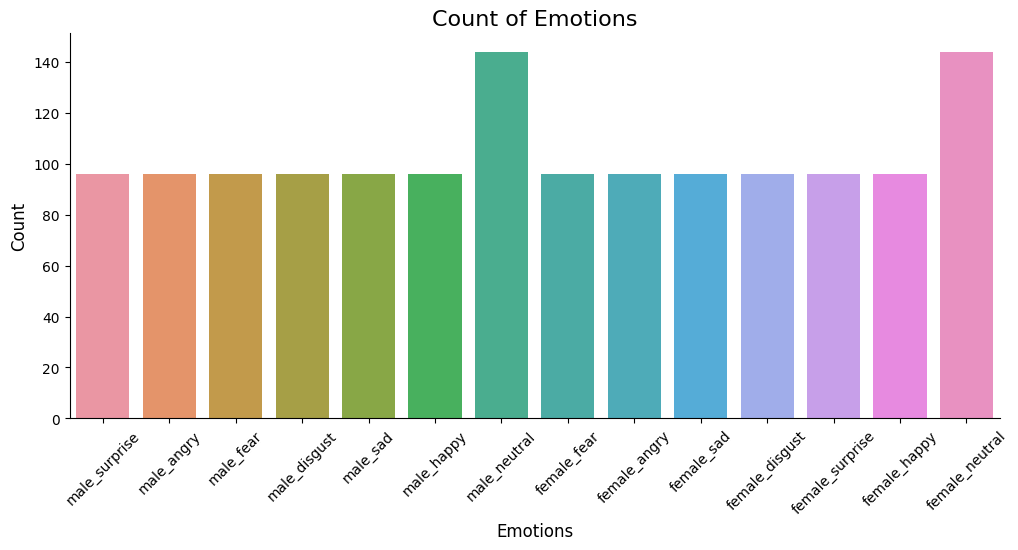

In [40]:
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(RAVD_df, x="labels")
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Mel Spectrograms

In [41]:
# Female Happy
fRA1= RAVD + 'Actor_08/03-01-03-02-02-01-08.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

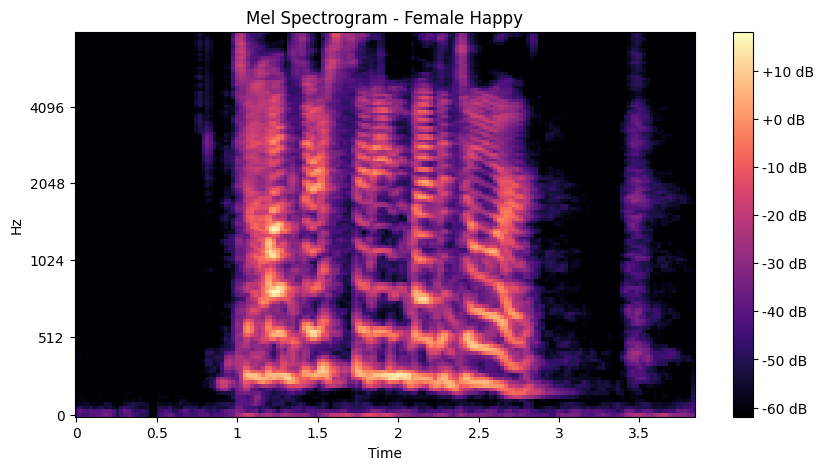

In [42]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Happy')
plt.colorbar(format='%+2.0f dB')

In [43]:
#Female Fear
fRA2=RAVD +'Actor_08/03-01-06-01-01-01-08.wav'
data, sr = librosa.load(fRA2)
ipd.Audio(fRA2) 

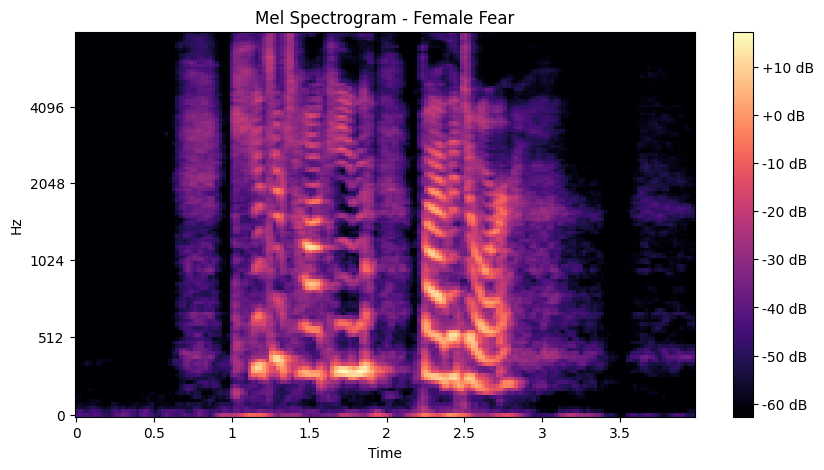

In [44]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fear')
plt.colorbar(format='%+2.0f dB');

In [45]:
# Female Disgust
fRA1 =RAVD +'Actor_20/03-01-08-02-02-02-20.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

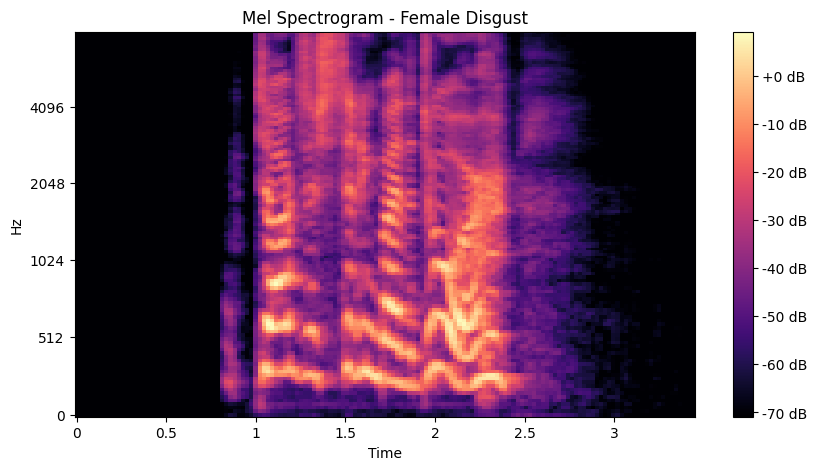

In [46]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Disgust')
plt.colorbar(format='%+2.0f dB');

In [47]:
# Male Fearfull
fRA1 = RAVD + 'Actor_19/03-01-04-01-02-01-19.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

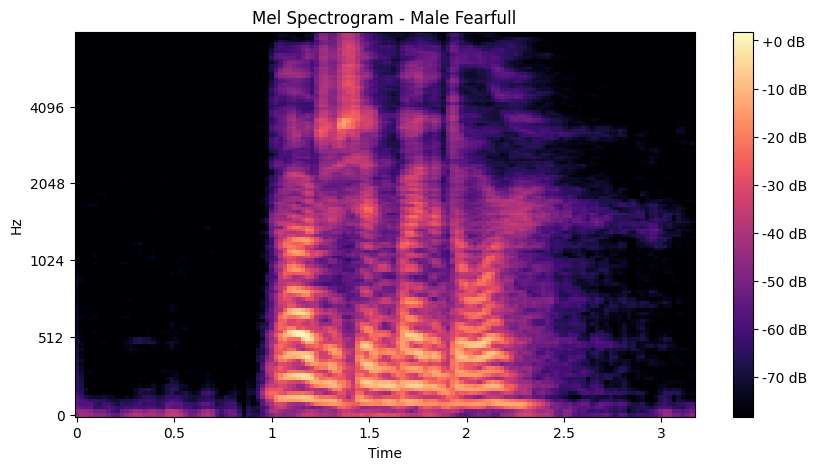

In [48]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Fearfull')
plt.colorbar(format='%+2.0f dB');

### MFCC

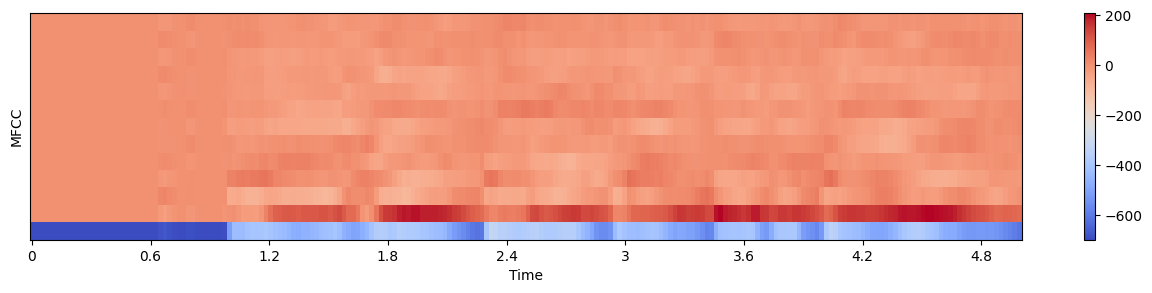

In [57]:
# Gender - Female; Emotion - Angry 
path = RAVD + "Actor_18/03-01-05-01-01-01-18.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

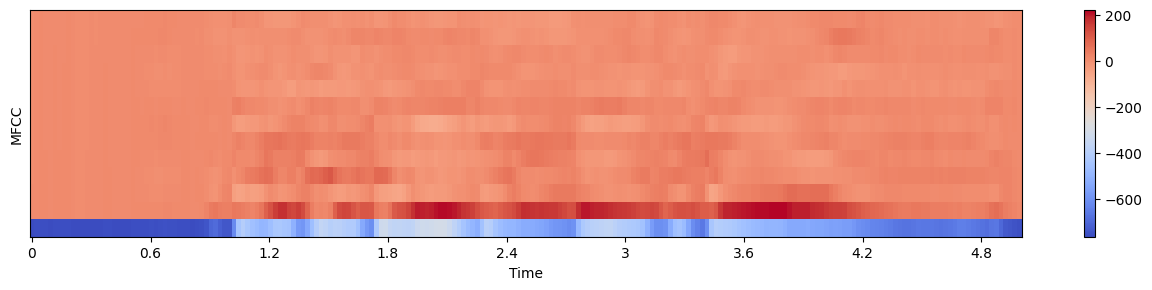

In [58]:
# Gender - Male; Emotion - Angry 
path = RAVD + "Actor_17/03-01-05-01-01-02-17.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


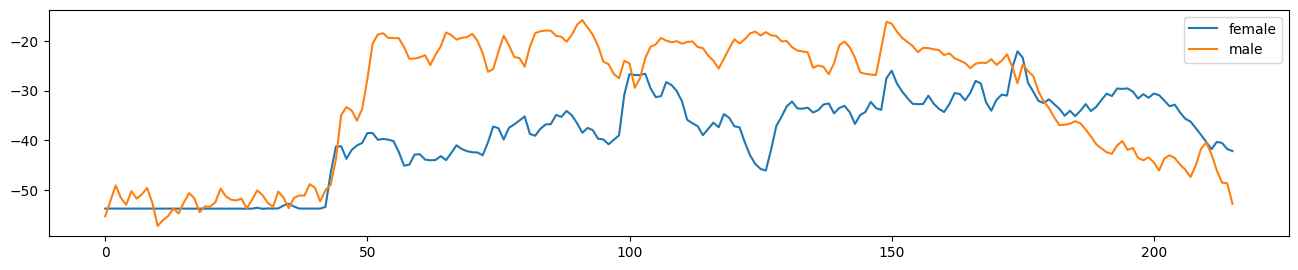

In [59]:
# Gender - Female; Emotion - angry
path = RAVD + "Actor_18/03-01-05-01-01-01-18.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5) 
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - angry
path = RAVD + "Actor_17/03-01-05-01-01-02-17.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


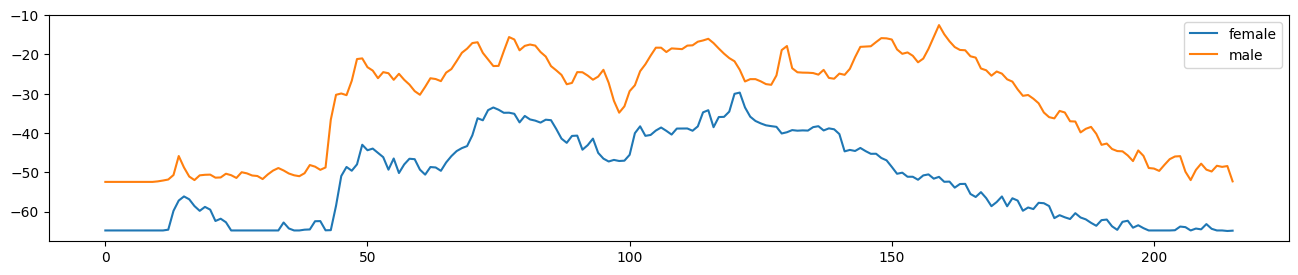

In [60]:
# Gender - Female; Emotion - Surprised
path = RAVD + "Actor_20/03-01-08-02-01-02-20.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - Surprised
path = RAVD + "Actor_21/03-01-08-02-01-01-21.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

## Data augmentation

In [76]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [62]:
# Trying different functions above
path = np.array(RAVD_df['path'])[471]
data, sample_rate = librosa.load(path)

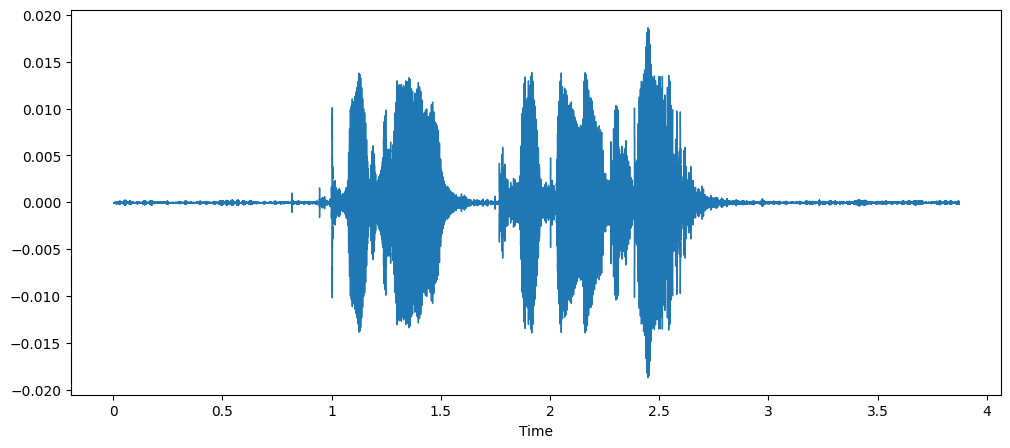

In [63]:
# Original audio
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

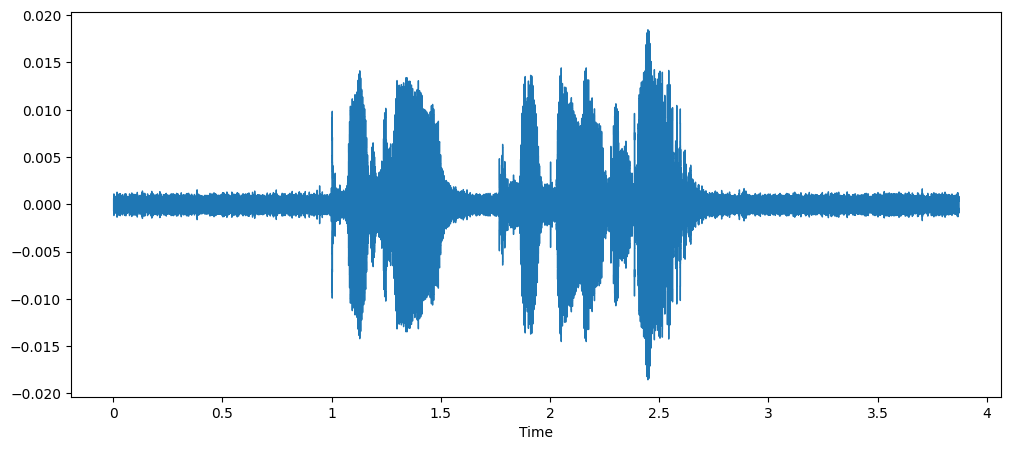

In [64]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

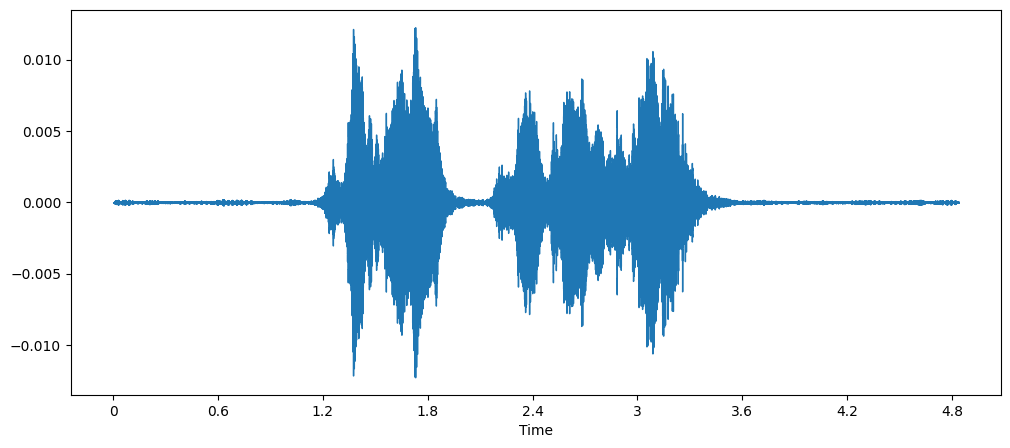

In [71]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

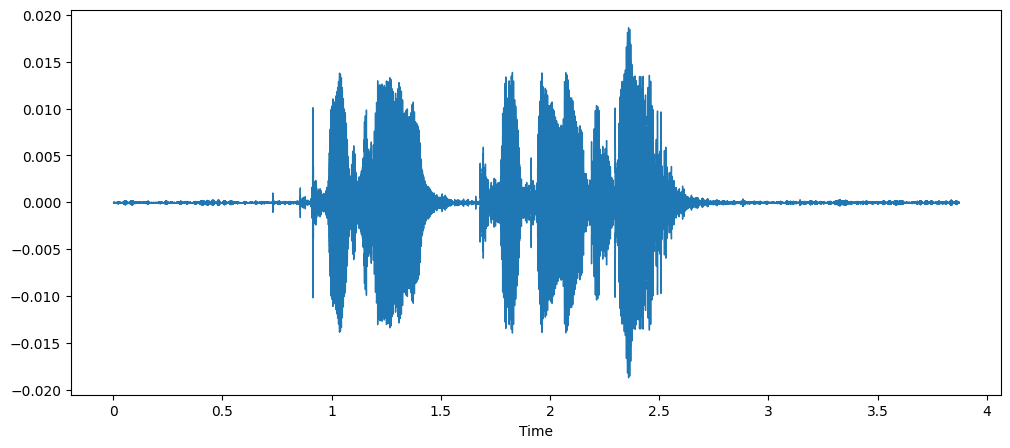

In [72]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

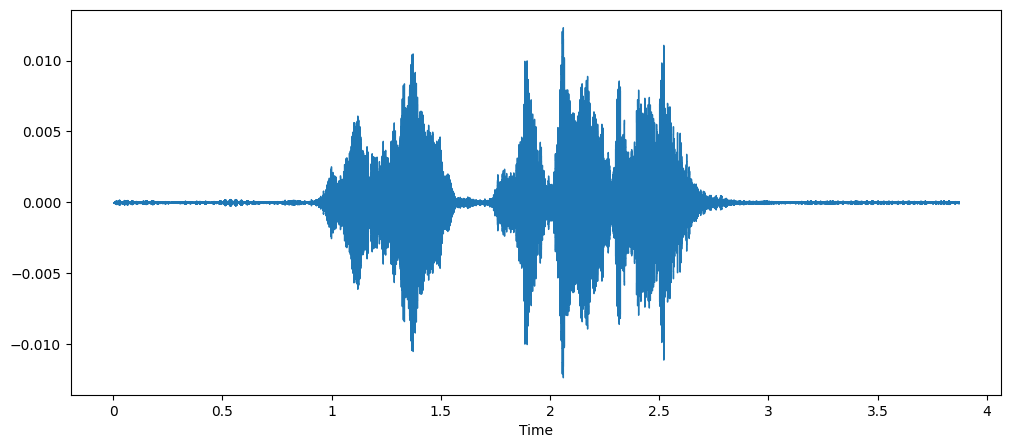

In [77]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature extraction

In [78]:
def feat_ext(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [79]:
RAVD_df.head()

labels   source                                               path
0  male_surprise  RAVDESS  /Users/husseinlopez/Documents/CICESE/Cursos/20...
1  male_surprise  RAVDESS  /Users/husseinlopez/Documents/CICESE/Cursos/20...
2     male_angry  RAVDESS  /Users/husseinlopez/Documents/CICESE/Cursos/20...
3      male_fear  RAVDESS  /Users/husseinlopez/Documents/CICESE/Cursos/20...
4      male_fear  RAVDESS  /Users/husseinlopez/Documents/CICESE/Cursos/20...

In [80]:
X, Y = [], []
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    feature = get_feat(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [81]:
Emotions = pd.DataFrame(X)
Emotions['labels'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0          1         2          3         4         5          6  \
0 -513.519958  63.119511 -6.124093  10.814543  0.782671 -5.806887  -9.440473   
1 -510.307953  63.147673 -5.935284  10.773153  0.675780 -5.834187  -9.501167   
2 -565.440369  58.772533 -8.237696   9.739211 -1.718610 -6.963483 -12.186068   
3 -603.982910  72.215614 -0.693250  11.239616  6.166300 -3.493289  -8.200874   
4 -459.649937  41.569932  7.379319   9.167344  4.331321 -3.045898  -5.784942   

           7          8         9  ...        11        12        13  \
0 -13.207559 -20.647575 -3.577919  ... -7.951563 -1.385222 -7.717222   
1 -13.310961 -20.428534 -3.629982  ... -8.015540 -1.325531 -7.542372   
2 -16.357052 -20.190208 -1.622917  ... -6.509039 -2.899866 -8.873233   
3  -9.026697 -13.254701 -8.109746  ... -7.217810 -1.131738 -6.677114   
4  -8.232222  -9.535274 -6.048416  ... -3.548295 -2.800706 -4.717797   

         14        15         16        17        18        19         labels  
0 -7.717461  0.152098 -13.163692 -4.506589 -1.895721 -4.732464  male_surprise  
1 -7.538947  0.187190 -13.142781 -4.575788 -1.622535 -4.602583  male_surprise  
2 -4.248735 -2.556085 -14.476712 -1.514428 -4.170960 -8.833672  male_surprise  
3 -6.218823  0.115268 -11.347706 -5.193700 -3.658670 -4.108804  male_surprise  
4 -4.212468 -1.954689  -7.419895 -4.967050 -2.184912 -4.774533  male_surprise  

[5 rows x 21 columns]

In [82]:
# can use this directly from saved feature .csv file
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

0          1         2          3         4         5          6  \
0 -513.519958  63.119511 -6.124093  10.814543  0.782671 -5.806887  -9.440473   
1 -510.307953  63.147673 -5.935284  10.773153  0.675780 -5.834187  -9.501167   
2 -565.440369  58.772533 -8.237696   9.739211 -1.718610 -6.963483 -12.186068   
3 -603.982910  72.215614 -0.693250  11.239616  6.166300 -3.493289  -8.200874   
4 -459.649937  41.569932  7.379319   9.167344  4.331321 -3.045898  -5.784942   

           7          8         9  ...        11        12        13  \
0 -13.207559 -20.647575 -3.577919  ... -7.951563 -1.385222 -7.717222   
1 -13.310961 -20.428534 -3.629982  ... -8.015540 -1.325531 -7.542372   
2 -16.357052 -20.190208 -1.622917  ... -6.509039 -2.899866 -8.873233   
3  -9.026697 -13.254701 -8.109746  ... -7.217810 -1.131738 -6.677114   
4  -8.232222  -9.535274 -6.048416  ... -3.548295 -2.800706 -4.717797   

         14        15         16        17        18        19         labels  
0 -7.717461  0.152098 -13.163692 -4.506589 -1.895721 -4.732464  male_surprise  
1 -7.538947  0.187190 -13.142781 -4.575788 -1.622535 -4.602583  male_surprise  
2 -4.248735 -2.556085 -14.476712 -1.514428 -4.170960 -8.833672  male_surprise  
3 -6.218823  0.115268 -11.347706 -5.193700 -3.658670 -4.108804  male_surprise  
4 -4.212468 -1.954689  -7.419895 -4.967050 -2.184912 -4.774533  male_surprise  

[5 rows x 21 columns]

## Data partitioning

In [91]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [88]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['labels'].values

In [89]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [92]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 14), (1080, 20), (1080, 14))

In [93]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 14), (1080, 20), (1080, 14))

## Training and evaluating models

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.411


In [102]:
clf2=KNeighborsClassifier(n_neighbors=4)
clf2 = clf2.fit(x_train,y_train)
y_pred=clf2.predict(x_test)

print("kNN score: {:.3f}".format(clf2.score(x_test, y_test)))

kNN score: 0.469


In [103]:
clf3=RandomForestClassifier()
clf3=clf3.fit(x_train,y_train)
y_pred=clf3.predict(x_test)

print("Random forest score: {:.3f}".format(clf3.score(x_test, y_test)))

Random forest score: 0.195


In [ ]:
# ML
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD